# Test Function 

In [2]:
using SymPy;

In [1]:
function secret0(x::Vector, a=20, b=0.2, c=2π)
    d = length(x)
    return -a*exp(-b*sqrt(sum(x.^2)/d)) - exp(sum(cos.(c*xi) for xi in x)/d) + a + exp(1)
end

secret0 (generic function with 4 methods)

In [3]:
x, y, z = symbols("x, y, z")

(x, y, z)

In [4]:
X = [x; y; z]

3-element Vector{Sym}:
 x
 y
 z

In [6]:
f = secret0(X)

                                                                              
                                                                              
   cos(6.28318530717959*x)   cos(6.28318530717959*y)   cos(6.28318530717959*z)
   ----------------------- + ----------------------- + -----------------------
              3                         3                         3           
- e                                                                           

                                   ______________
                                  /  2    2    2 
                                 /  x    y    z  
                         -0.2*  /   -- + -- + -- 
                              \/    3    3    3  
 + 22.718281828459 - 20*e                        

In [8]:
xx = [0.1;0.1;0.1]

3-element Vector{Float64}:
 0.1
 0.1
 0.1

In [9]:
fo = secret0(xx)

0.8686089961219463

In [7]:
g = Sym[diff(f,var) for var in X] 

3-element Vector{Sym}:
 1.33333333333333*x*exp(-0.2*sqrt(x^2/3 + y^2/3 + z^2/3))/sqrt(x^2/3 + y^2/3 + z^2/3) + 2.0943951023932*exp(cos(6.28318530717959*x)/3 + cos(6.28318530717959*y)/3 + cos(6.28318530717959*z)/3)*sin(6.28318530717959*x)
 1.33333333333333*y*exp(-0.2*sqrt(x^2/3 + y^2/3 + z^2/3))/sqrt(x^2/3 + y^2/3 + z^2/3) + 2.0943951023932*exp(cos(6.28318530717959*x)/3 + cos(6.28318530717959*y)/3 + cos(6.28318530717959*z)/3)*sin(6.28318530717959*y)
 1.33333333333333*z*exp(-0.2*sqrt(x^2/3 + y^2/3 + z^2/3))/sqrt(x^2/3 + y^2/3 + z^2/3) + 2.0943951023932*exp(cos(6.28318530717959*x)/3 + cos(6.28318530717959*y)/3 + cos(6.28318530717959*z)/3)*sin(6.28318530717959*z)

In [15]:
ee = [e(X[1] => xx[1], X[2] => xx[2], X[3] => xx[3]) for e in g]

3-element Vector{Sym}:
 0.769800358919501*sqrt(3)*exp(-0.0115470053837925*sqrt(3)) + 2.76457843091502
 0.769800358919501*sqrt(3)*exp(-0.0115470053837925*sqrt(3)) + 2.76457843091502
 0.769800358919501*sqrt(3)*exp(-0.0115470053837925*sqrt(3)) + 2.76457843091502

In [21]:
Int(round(ee[1] *5 + 2))

22

# Constraints

In [1]:
include("helpers.jl")
include("simple.jl")

simple3_init (generic function with 1 method)

In [2]:
using Plots

In [3]:
function simple1_constraints(x::Vector)
    return [x[1] + x[2]^2 - 1,
            -x[1] - x[2]]
end

simple1_constraints (generic function with 1 method)

In [27]:
x, y = symbols("x, y")
X = [x, y]

2-element Vector{Sym}:
 x
 y

In [33]:
h = simple1_constraints(X)

2-element Vector{Sym}:
 x + y^2 - 1
      -x - y

In [46]:
j1 = solve((h[1]), (y))

2-element Vector{Sym}:
 -sqrt(1 - x)
  sqrt(1 - x)

In [60]:
xr = Vector(-3:0.1:3)
jr1 = [ real(j1[1](x => i)) for i in xr];
jr2 = [ real(j1[2](x => i)) for i in xr];

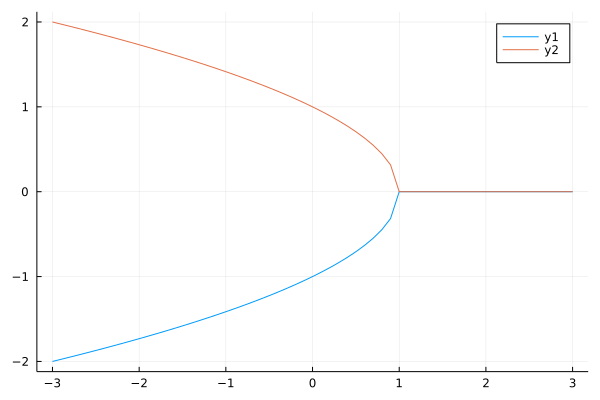

In [61]:
plot(xr, jr1)
plot!(xr, jr2)

In [4]:
xr = Vector(-3:0.1:3)
yr = Vector(-3:0.1:3)
v = [[a,b] for (a,b) in zip(xr, yr)];
v[1:3,:]

3×1 Matrix{Vector{Float64}}:
 [-3.0, -3.0]
 [-2.9, -2.9]
 [-2.8, -2.8]

In [5]:
# simple1_constraints(v[1])
c= [simple1_constraints([a,b]) for a=xr, b=yr]
c[1:3, :]

3×61 Matrix{Vector{Float64}}:
 [5.0, 6.0]  [4.41, 5.9]  [3.84, 5.8]  …  [4.41, 0.1]   [5.0, 0.0]
 [5.1, 5.9]  [4.51, 5.8]  [3.94, 5.7]     [4.51, 0.0]   [5.1, -0.1]
 [5.2, 5.8]  [4.61, 5.7]  [4.04, 5.6]     [4.61, -0.1]  [5.2, -0.2]

In [21]:
c1 = []
s1 = size(c, 1)
for row = 1:s1
    for col = 1:s1
        push!(c1, c[row, col][1])
    end
end


# c1 = reshape(c1, s1, s1);
c1

3721-element Vector{Any}:
  5.0
  4.41
  3.839999999999999
  3.290000000000001
  2.7600000000000007
  2.25
  1.7599999999999998
  1.2899999999999991
  0.8400000000000007
  0.41000000000000014
  ⋮
  6.840000000000001
  7.289999999999999
  7.76
  8.25
  8.760000000000002
  9.290000000000001
  9.84
 10.41
 11.0

In [25]:
filter(x-> (x == 0), c1)

5-element Vector{Any}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
c1_filt = c1 .== 0

3721-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [24]:
c1[c1_filt]

ErrorException: syntax: invalid identifier name "."

In [ ]:
a = [[5.0, 6.0]  [4.41, 5.9]  [3.84, 5.8]]

In [119]:
simple2_constraints([1, -0.5])

2-element Vector{Float64}:
  1.5
 -1.5

In [1]:
using LinearAlgebra

In [5]:
m =2
mm = Matrix(1.0 * I, m, m)

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [7]:
mm[1,:]

2-element Vector{Float64}:
 1.0
 0.0

In [14]:
function test()
    for i = 1:20
        println(i)
        if i > 5
            return 
        end
        println("bye!")
    end
    println("bye in function")
end
test()


1
bye!
2
bye!
3
bye!
4
bye!
5
bye!
6


In [15]:
arr = [1,2,3,4,5.01,5.02, 5.002]

7-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0
 5.01
 5.02
 5.002

In [16]:
arr[end-1]

5.02

In [20]:
total_diff = 0
for i = 1:5
    diff = arr[end] - arr[end-1]
    println(diff)
    total_diff += diff
end

if total_diff < 1
    print("convergence!")
end
println(total_diff)

-0.017999999999999794
-0.017999999999999794
-0.017999999999999794
-0.017999999999999794
-0.017999999999999794
convergence!-0.08999999999999897


# generate a positive spanning set 

In [8]:
# need 3 linearly independent vectors
# start with basis vectors
i = [1; 0]
j = [1;0]
s = [i,j]
s = [1 2; 3 5]

2-element Vector{Vector{Int64}}:
 [1, 0]
 [1, 0]

In [16]:
D = [[1; 2],  [3; 5]]

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 5]

In [21]:
D = [[1, 2],  [3, 5], [-7, -3]]
x = [1,2]
for (i, d) in enumerate(D)
    println(x + 2*d)
end

[3, 6]
[7, 12]
[-13, -4]


2-element Vector{Int64}:
 1
 2

In [ ]:
2*